In [2]:
import json
import gurobipy as gp
from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt
from interaction_inference import simulation
from interaction_inference.constraints import Constraint
from interaction_inference.optimization import Optimization

In [3]:
rng = np.random.default_rng(1)

In [28]:
# simulate sample
data = simulation.simulate_dataset_range_BD(
    name = "test",
    interaction_values = [50, 20, 10, 8, 6, 4, 2, 1, 0.5, 0], #[5, 4.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5, 0],
    cells = 1000,
    rate = 1,
    tqdm_disable = False
)

100%|██████████| 10/10 [00:07<00:00,  1.32it/s]


In [47]:
# downsample
m = 0.95
b = (1 / m) - 1
beta = rng.beta(1, b, size=1000)
data_downsampled = data.downsample("test", beta)

In [53]:
data_downsampled.thresh_OG = 10 ** -2

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 49.65it/s]


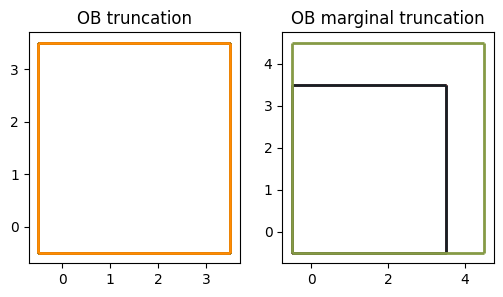

100%|██████████| 16/16 [00:00<00:00, 729.65it/s]


In [54]:
# bootstrap
data_downsampled.compute_probabilities(display=True, tqdm_disable=False)

In [55]:
data_downsampled.truncation_OG

{0: (0, 6), 1: (1, 6), 2: (2, 7), 3: (3, 8), 4: (4, 10)}

In [56]:
# construct constraints
constraints = Constraint(
    marginal_probability_1 = True,
    marginal_probability_2 = True,
    marginal_CME_1 = True,
    marginal_CME_2 = True,
    k_deg_1 = True,
    k_deg_2 = True
)

# optimize
opt = Optimization(data_downsampled, constraints, tqdm_disable=True, print_solution=True)

Optimization status: INFEASIBLE
Runtime: 0.010999917984008789
Optimization status: INFEASIBLE
Runtime: 0.03299999237060547
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.1940000057220459
Optimization status: INFEASIBLE
Runtime: 0.016000032424926758
Optimization status: OPTIMAL
Runtime: 0.017999887466430664
Optimization status: OPTIMAL
Runtime: 0.003999948501586914
Optimization status: OPTIMAL
Runtime: 0.037000179290771484
Optimization status: OPTIMAL
Runtime: 0.0
Optimization status: OPTIMAL
Runtime: 0.039999961853027344


In [57]:
# construct constraints
constraints = Constraint(
    joint_probability = True,
    CME = True,
    k_deg_1 = True
)

# optimize
opt = Optimization(data_downsampled, constraints, tqdm_disable=True, print_solution=True)

Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.009999990463256836
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0010001659393310547
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0
Optimization status: INFEASIBLE
Runtime: 0.0


Truncation sig smaller for -2 than -6 (even -3 gets fiarly large)

Epsilon doesnt change indep BD results

Int BD infeasible for -2, -3, etc and still very slow